# Regresión Lineal - Scikit-learn

In [44]:
import pandas as pd
#Header None → No existe cabecera
#Deli_whitespace → Los delimitadores son espacios en blanco. 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",header=None,delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [45]:
cadena = """    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's"""

#Extraer los nombres de las columnas
lista = cadena.split(" ")
lista_resultado = []
for elemento in lista:
    if(elemento==elemento.upper() and elemento != "" and elemento.isalnum() and not elemento.isdigit()):
        lista_resultado.append(elemento)

lista_resultado

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [46]:
#Nombre de las columnas
df.columns = lista_resultado
#El nombre de las columnas en minusculas
df.columns = df.columns.str.lower()

In [47]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Entendiendo los Datos

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
#Aplicar estilo a seaborn
sns.set(style="whitegrid",context = "notebook")

In [49]:
cols = ["dis","indus","crim","rm","medv"]

# Primer Gráfico

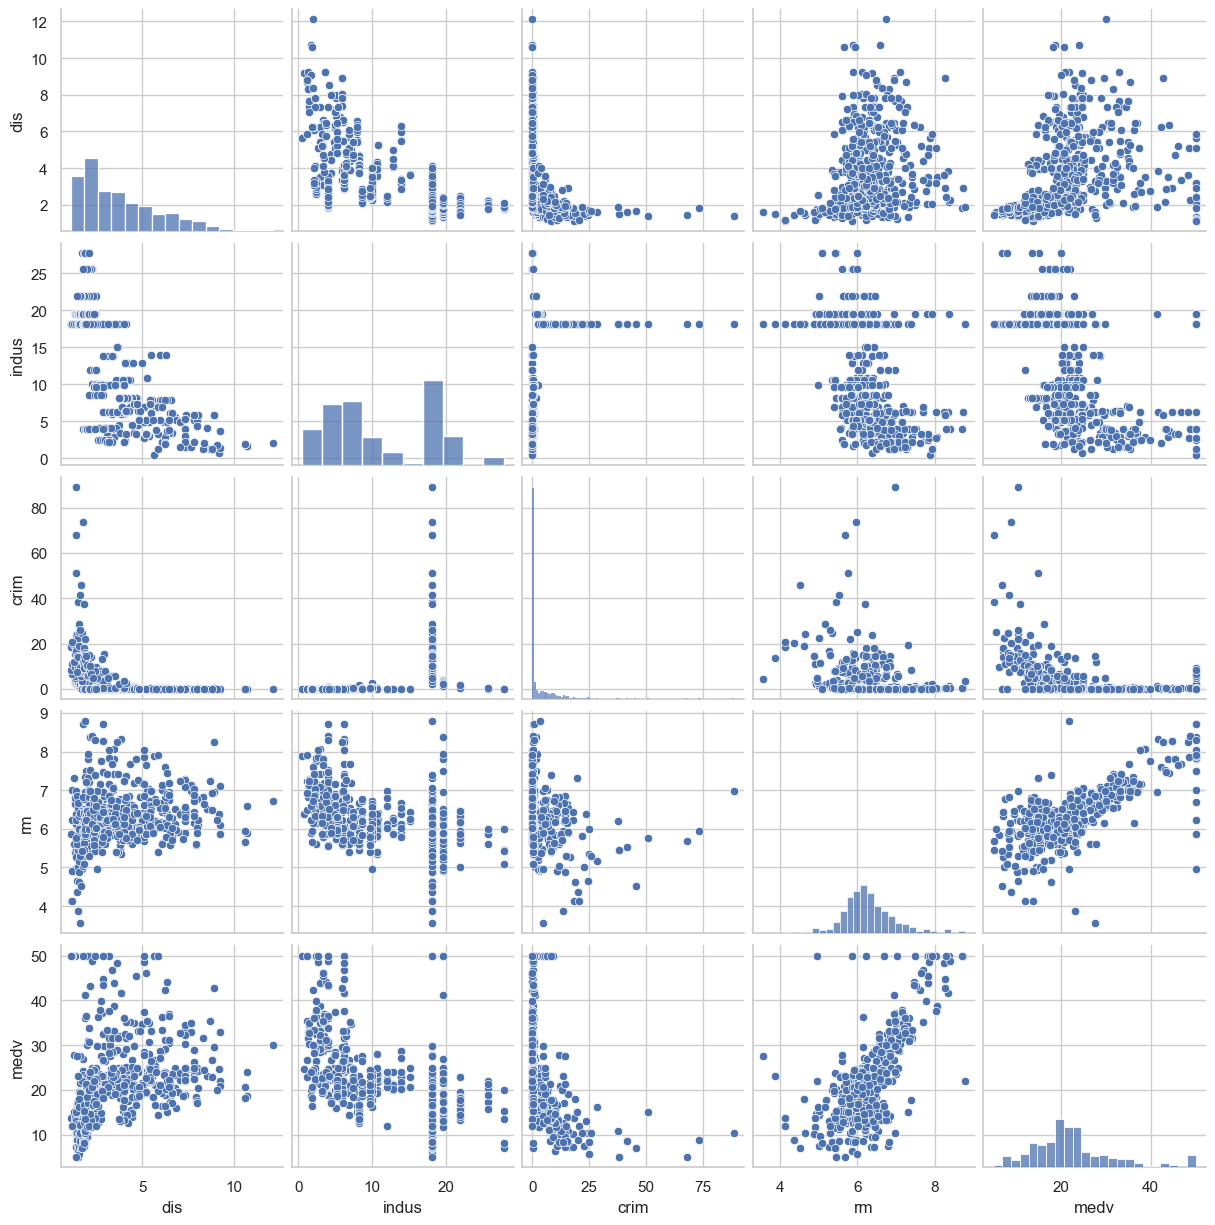

In [50]:
#Gráficos de Puntos Extremos
sns.pairplot(df[cols],height=2.5)

* La Diagonal muestra una gráfica de Frecuencias. 

* Los Análisis Visuales siempre se acompañan de un "número"

Método NUMPY

<AxesSubplot:>

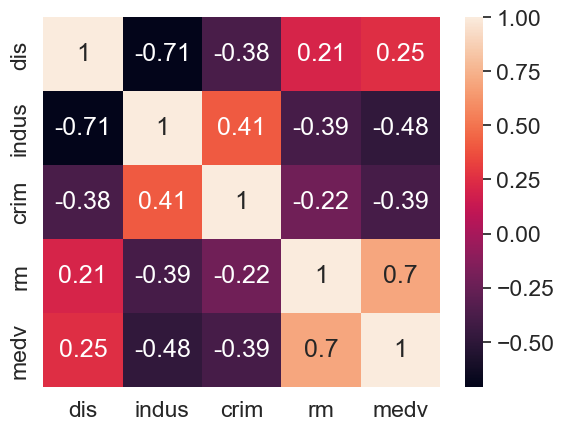

In [51]:
#En este caso usamos un indidce de correlación para unas cuantas variables
#Pero lo hacemos con numpy
import numpy as np
#Que la matriz de correlación, la transformamos con numpy. 
cm = np.corrcoef(df[cols].values.T)
#Agrego una fuente considerable a seaborn en tamaño de letra
sns.set(font_scale = 1.5)
#Construyo un mapa de calor, donde la barra estará, y las anotaciones tambien
#Las etiquetas de los nombres vendrán de sus respectivas columnas
sns.heatmap(cm,cbar=True,annot=True,yticklabels=cols,xticklabels=cols)

* Para Hacerlo con Pandas

<AxesSubplot:>

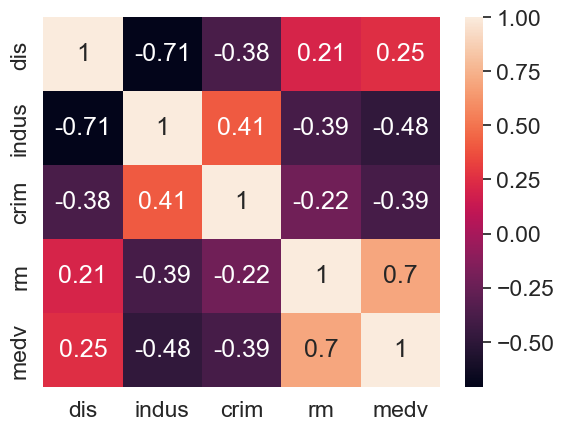

In [52]:
import numpy as np
cm = df[cols].corr()
sns.set(font_scale = 1.5)
sns.heatmap(cm,cbar=True,annot=True,yticklabels=cols,xticklabels=cols)

# Entonces...

* Decimos que medv está correlacionado con rm, pero también posee una ligera correlación negativa con indus hehe

# Creando Modelo con Sklearn

In [56]:
#Librerías de Regresión Lineal
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# -1, 1, Tomamos la cantidad (4,) y la transformamos a (4,1)
x = df["rm"].values.reshape(-1,1)
y = df["medv"].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(x)
Y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std,Y_std)

LinearRegression()

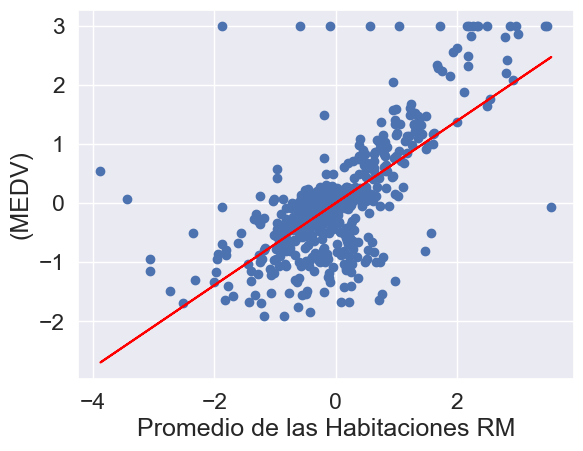

In [57]:
#Gráfico de la Función que he empleado

#Estos son mis datos con los cuales entrene mi modelo
plt.scatter(X_std,Y_std)
#Obviamente nuestra prediccions nos arroja una linea, cuyos puntos serán
#Los X de entrenamiento pero... los Y serán la predicción!!! Predict!!
plt.plot(X_std,slr.predict(X_std),color="red") #Le agregamos color. 
plt.ylabel("(MEDV)")
plt.xlabel("Promedio de las Habitaciones RM")
plt.show()

# Generando Predicciones

In [58]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
sc_y.inverse_transform(slr.predict(num_habitaciones_std))

array([[10.83992413]])

# Regresión Lineal Múltiple

In [61]:
#Librerías de Regresión Lineal
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# -1, 1, Tomamos la cantidad (4,) y la transformamos a (4,1)
x = df[["rm","indus"]].values
y = df["medv"].values.reshape(-1,1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(x)
Y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std,Y_std)

LinearRegression()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_9008\3083457994.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection ="3d")


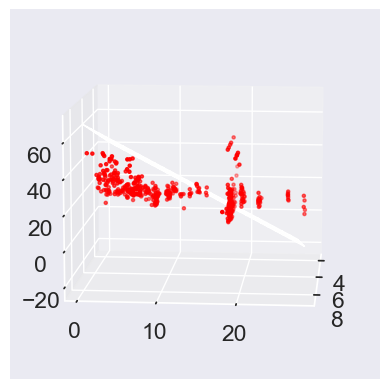

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import * 
import numpy as np
import pandas as pd

#Graficar en 3 Dimensiones.

#Acontinuación Hacemos lo posible para crear un plano
#Lo delimitamos con las variables implicadas, rm e indus que iran desde su valor mínimo hasta su valor máximo. 
x1_range = np.arange(df["rm"].min(),df["rm"].max())
x2_range = np.arange(df["indus"].min(),df["indus"].max())

#Creación de una malla. con los rangos. 
x1,x2 = np.meshgrid(x1_range,x2_range)

#Ravel colocal los datos en meshgrid a una sola columna. 
plano = pd.DataFrame({"RM":x1.ravel(),"indus":x2.ravel()})

pred = slr.predict(plano).reshape(x1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.gca(projection ="3d")
ax.plot_surface(x1,x2,pred,alpha=0.4)

ax.scatter3D(df["rm"],df["indus"],df["medv"],color="red",marker=".")
ax.view_init(elev=10,azim=5)

* Puedes descartar label

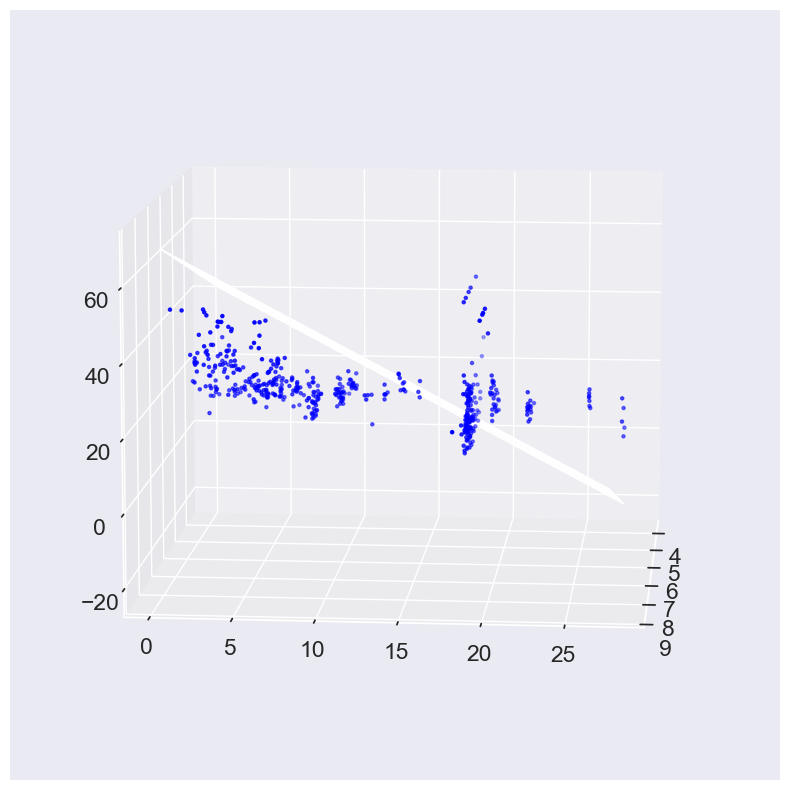

In [111]:
# Creating the plot.

#Creo la figura correspondiente
fig = plt.figure(figsize=(10, 10))
#Deseo una proyección 3D en cuanto a mi gráfico
axes = plt.axes(projection='3d')
#Primer eje será mi primera, variable, así con la segunda y Z sera la predicción. 
#Por suspuesto esto con respecto al plano
axes.plot_surface(x1, x2, pred, alpha=1)
#Grafico los Puntos Originales que son mis datos reales. 
#El marcador será el clásico punto. 
axes.scatter(df['rm'], df['indus'], df['medv'], label='Housing Data', marker='.', color='blue')
#Cambiar la perspectiva para ver el modelo de una forma mas adecuada
axes.view_init(10, 5)
plt.show()

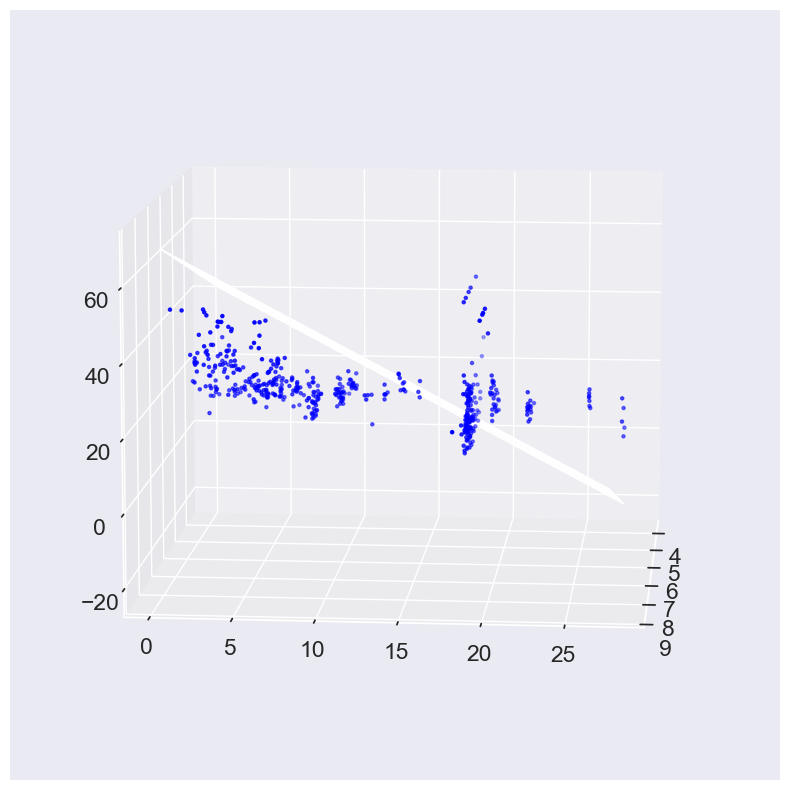

In [92]:
# Creating the plot.
fig = plt.figure(figsize=(10, 10))
axes = plt.axes(projection='3d')
axes.plot_surface(x1, x2, pred, alpha=1)
axes.scatter(df['rm'], df['indus'], df['medv'], marker='.', color='blue')
axes.view_init(10, 5)
plt.show()